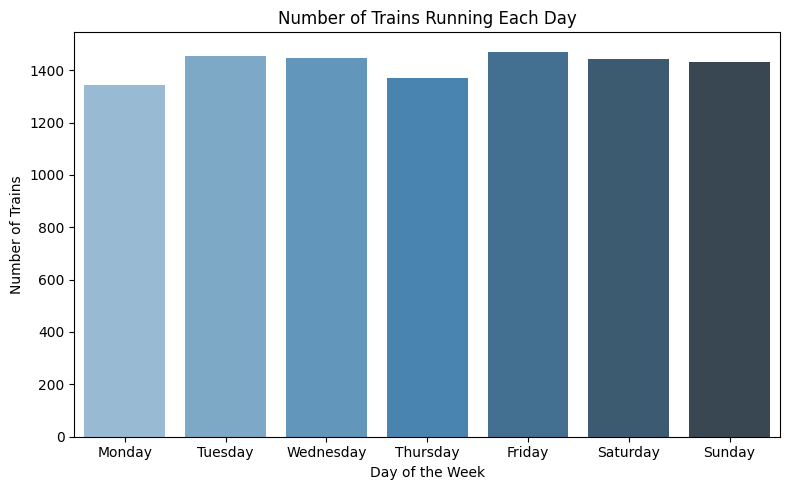

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_excel("Railway_info.csv.xlsx")

# Expand 'Days' column
df['Days_List'] = df['days'].apply(lambda x: str(x).split())
df_exploded = df.explode('Days_List')

# Count how many trains run each day
day_counts = df_exploded['Days_List'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Convert to DataFrame for hue usage
day_df = day_counts.reset_index()
day_df.columns = ['Day', 'Train_Count']

# Plot using hue to satisfy future requirements
plt.figure(figsize=(8, 5))
sns.barplot(data=day_df, x='Day', y='Train_Count', hue='Day', palette='Blues_d', legend=False)
plt.title("Number of Trains Running Each Day")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trains")
plt.tight_layout()
plt.show()


In [6]:
# Top 5 Source Stations
print("Top 5 Source Stations:")
print(df['Source_Station_Name'].value_counts().head())

# Top 5 Destination Stations
print("\nTop 5 Destination Stations:")
print(df['Destination_Station_Name'].value_counts().head())


Top 5 Source Stations:
Source_Station_Name
CST-MUMBAI       513
SEALDAH          372
CHENNAI BEACH    339
HOWRAH JN.       338
KALYAN JN        285
Name: count, dtype: int64

Top 5 Destination Stations:
Destination_Station_Name
CST-MUMBAI       514
SEALDAH          373
CHENNAI BEACH    342
HOWRAH JN.       337
KALYAN JN        284
Name: count, dtype: int64


In [8]:
# Print the train count per day again for reference
print("\nTrain counts by day:")
print(day_counts)

# Calculate percentage distribution
day_percent = (day_counts / day_counts.sum()) * 100
print("\nPercentage of trains operating each day:")
print(day_percent.round(2))



Train counts by day:
Days_List
Monday       1342
Tuesday      1454
Wednesday    1448
Thursday     1372
Friday       1471
Saturday     1441
Sunday       1432
Name: count, dtype: int64

Percentage of trains operating each day:
Days_List
Monday       13.47
Tuesday      14.60
Wednesday    14.54
Thursday     13.78
Friday       14.77
Saturday     14.47
Sunday       14.38
Name: count, dtype: float64
